In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# split para modelado
from sklearn.model_selection import train_test_split
# Scaled | Escalado
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Encoding | Codificación
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
# To save models
import json
import pickle
from pickle import dump
from sklearn.model_selection import train_test_split, GridSearchCV
# Feature Selection
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, root_mean_squared_error, r2_score
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.metrics import accuracy_score
from utils import get_classifier_metrics
from sklearn.metrics import confusion_matrix
# Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression 


from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


In [2]:
df = pd.read_csv("../data/raw/diabetes.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46


### Decision tree diabetes

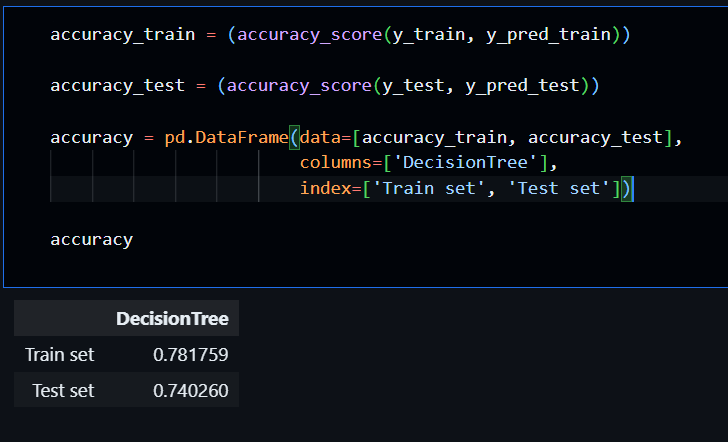
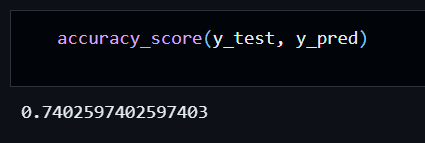

### Random forest diabetes

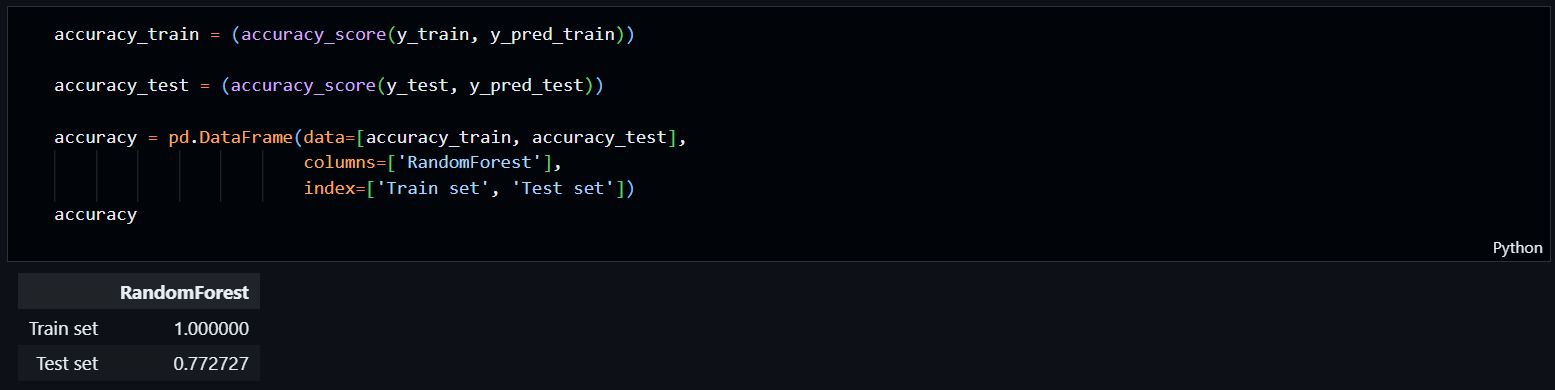
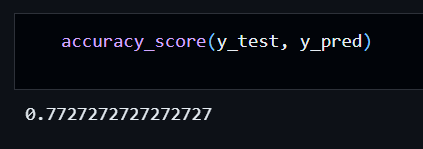

In [4]:
xgb = XGBClassifier(n_estimators=50,
                    learning_rate=0.1,
                    random_state=10,
                    use_label_encoder=False,
                    eval_metric='mlogloss')
ada = AdaBoostClassifier(n_estimators=50,
                         learning_rate=0.1,
                         random_state=10)
gb = GradientBoostingClassifier(n_estimators=50,
                                learning_rate=0.1,
                                random_state=10)
lgb = LGBMClassifier(n_estimators=50,
                     learning_rate=0.5,
                     random_state=10)

In [5]:
ada.fit(X_train, y_train), gb.fit(X_train, y_train), xgb.fit(X_train, y_train), lgb.fit(X_train, y_train)

/home/vscode/.local/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [08:42:04] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 213, number of negative: 401
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000162 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 664
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.346906 -> initscore=-0.632669
[LightGBM] [Info] Start training from score -0.632669
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

(AdaBoostClassifier(learning_rate=0.1, random_state=10),
 GradientBoostingClassifier(n_estimators=50, random_state=10),
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric='mlogloss',
               feature_types=None, feature_weights=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.1, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=50, n_jobs=None,
               num_parallel_tree=None, ...),
 LGBMClassifier(learning_rate=0.5, n_estimators=50, random_state=10))

In [6]:
# predicción
ada_y_pred_test = ada.predict(X_test)
gb_y_pred_test = gb.predict(X_test)
xgb_y_pred_test = xgb.predict(X_test)
lgb_y_pred_test = lgb.predict(X_test)

ada_y_pred_train = ada.predict(X_train)
gb_y_pred_train = gb.predict(X_train)
xgb_y_pred_train = xgb.predict(X_train)
lgb_y_pred_train = lgb.predict(X_train)

In [7]:
accuracy_train = (accuracy_score(y_train, ada_y_pred_train),
                  accuracy_score(y_train, gb_y_pred_train),
                  accuracy_score(y_train, xgb_y_pred_train),
                  accuracy_score(y_train, lgb_y_pred_train))
accuracy_test = (accuracy_score(y_test, ada_y_pred_test),
                 accuracy_score(y_test, gb_y_pred_test),
                 accuracy_score(y_test, xgb_y_pred_test),
                 accuracy_score(y_test, lgb_y_pred_test))

accuracy = pd.DataFrame(data=[accuracy_train, accuracy_test],
                        columns=['AdaBoost', 'Gradient Boosting', 'XGBoost', 'LightGBM'],
                        index=['Train set', 'Test set'])

accuracy

,AdaBoost,Gradient Boosting,XGBoost,LightGBM
Train set,0.780130,0.892508,0.985342,1.000000
Test set,0.779221,0.766234,0.733766,0.681818


AdaBoost

    > Precisión Train: 0.7801
    > Precisión Test: 0.7792
    > Diferencia (Train - Test): 0.0009
    > Conclusión: Mejor generalización (casi sin sobreajuste). Es el modelo más fiable.

Decision Tree:

    > Precisión Train: 0.781759
    > Precisión Test: 0.740260
    > Diferencia (Train - Test): 0.041499
    > Conclusión: Exhibe una buena estabilidad con bajo sobreajuste, aunque su precisión total es inferior a la de la mayoría de los métodos de ensemble.

Random Forest:

    > Precisión Train: 1.000000
    > Precisión Test: 0.772727
    > Diferencia (Train - Test): 0.227273
    > Conclusión: Logró una precisión perfecta en el entrenamiento (1.000000), pero a pesar del sobreajuste significativo, su precisión de prueba se mantiene cerca del mejor modelo (AdaBoost).

Gradient Boosting

    > Precisión Train: 0.8925
    > Precisión Test: 0.7662
    > Diferencia (Train - Test): 0.1263
    > Conclusión: Moderado sobreajuste.

XGBoost

    > Precisión Train: 0.9853
    > Precisión Test: 0.7338
    > Diferencia (Train - Test): 0.2515
    > Conclusión: Alto sobreajuste.

LightGBM

    > Precisión Train: 1.0000
    > Precisión Test: 0.6818
    > Diferencia (Train - Test): 0.3182
    > Conclusión: Grave sobreajuste (Perfecto en entrenamiento, Pobre en prueba).

El modelo AdaBoost es el mejor y más confiable para predecir la diabetes porque logró la precisión más alta (0.7792) en datos de prueba que nunca había visto. Esto significa que es el que mejor acierta cuando se enfrenta a nuevos pacientes. Además, AdaBoost mostró el menor "sobreajuste", lo que quiere decir que aprendió bien el patrón general sin memorizar detalles innecesarios de los datos de entrenamiento. En contraste, modelos como LightGBM y XGBoost, aunque parecían perfectos en los datos de entrenamiento (con precisiones de casi 1.0), fallaron mucho en los datos de prueba porque sufrieron un sobreajuste grave, haciéndolos poco útiles para predicciones reales. Por lo tanto, AdaBoost es la elección más robusta y la que mejor generaliza el problema.